In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# TRAIN DATASET

In [2]:
df = pd.read_csv('C://Users//tyagi//Documents//titanic train//train.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# TARGET COLUMN = SURVIVED

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [6]:
df.select_dtypes(include='object').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
Name        891 non-null object
Sex         891 non-null object
Ticket      891 non-null object
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: object(5)
memory usage: 34.9+ KB


In [7]:
df.shape

(891, 12)

In [8]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [9]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# EDA

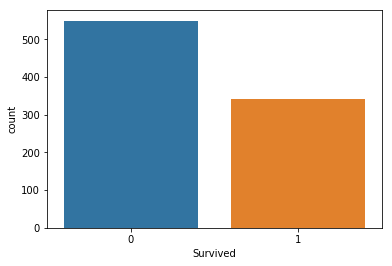

In [10]:
sns.countplot(df['Survived'])

In [11]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

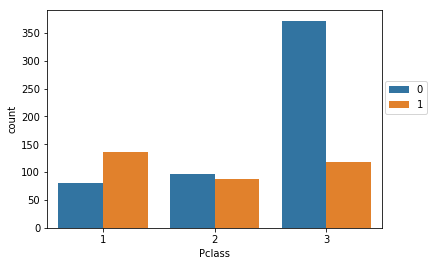

In [12]:
sns.countplot(df['Pclass'].sort_index(),hue=df['Survived'])
plt.xticks(rotation=0)
plt.legend(bbox_to_anchor=(0.5,0.3,0.65,0.4))

# Maximum Passengers are of Class 3.

In [13]:
round(df.groupby('Pclass')['Survived'].value_counts()/len(df['Survived'])*100,2)

# Displaying Percentage wise Survivors in each Pclass.

Pclass  Survived
1       1           15.26
        0            8.98
2       0           10.89
        1            9.76
3       0           41.75
        1           13.36
Name: Survived, dtype: float64

In [14]:
def value_counts(i):
     return df[i].value_counts().sort_index()

In [15]:
value_counts('Pclass')

1    216
2    184
3    491
Name: Pclass, dtype: int64

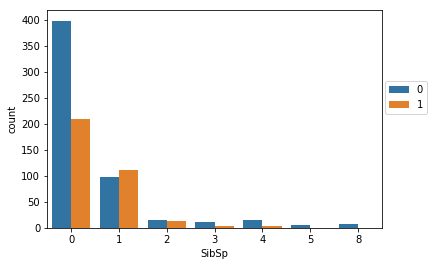

In [16]:
sns.countplot(df['SibSp'],hue=df['Survived'])
plt.legend(bbox_to_anchor=(0.5,0.3,0.65,0.4))

In [17]:
df.select_dtypes('object').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
Name        891 non-null object
Sex         891 non-null object
Ticket      891 non-null object
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: object(5)
memory usage: 34.9+ KB


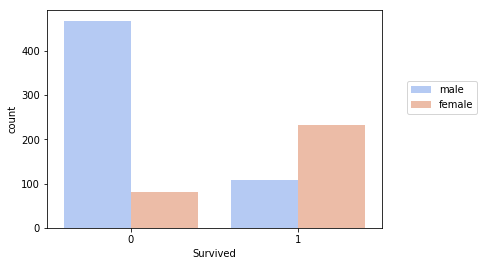

In [18]:
sns.countplot(df['Survived'],hue=df['Sex'],palette='coolwarm')
plt.legend(bbox_to_anchor=(0.5,0.3,0.8,0.4))

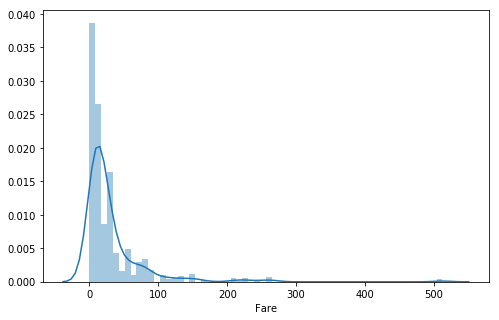

In [19]:
plt.figure(figsize=(8,5))
sns.distplot(df['Fare'],bins=60,)

# Missing Values

In [20]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [21]:
len(df)

891

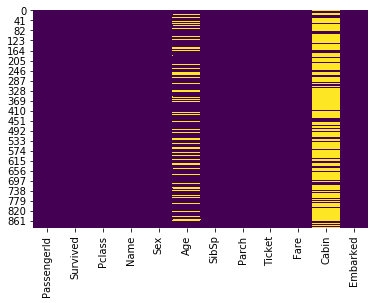

In [22]:
sns.heatmap(df.isnull(),cbar=False,cmap='viridis')

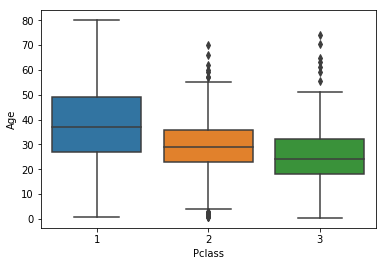

In [23]:
# Age Column
sns.boxplot(df['Pclass'],df['Age'])

# Fillna on the basis of Pclass i.e. for Pclass 1 = Age 38

In [24]:
round(df.groupby('Pclass')['Age'].mean())

Pclass
1    38.0
2    30.0
3    25.0
Name: Age, dtype: float64

In [25]:
def age_fill(col):
    Age = col[0]
    Pclass = col[1]
    if pd.isnull(Age):
        if Pclass==1:
            return 37
        elif Pclass==2:
            return 30
        else:
            return 25
    else:
        return Age

In [26]:
df['Age'] = df[['Age','Pclass']].apply(age_fill,axis=1)

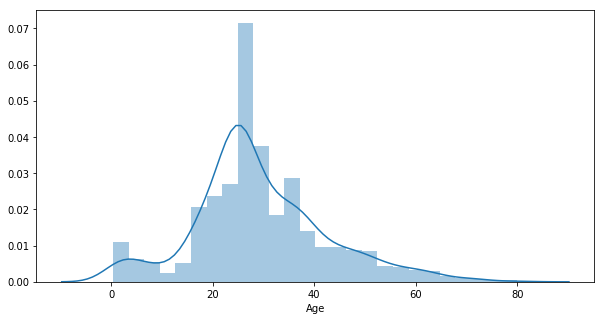

In [27]:
plt.figure(figsize=(10,5))
sns.distplot(df['Age'])

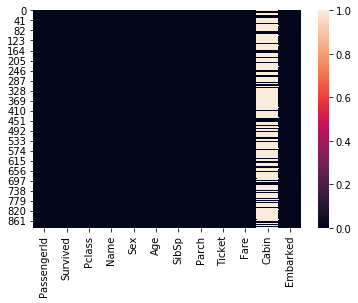

In [28]:
sns.heatmap(df.isnull())   # No null values in Age column.

In [29]:
# Cabin column
df['Cabin'].head()

# Cabin column is not relevant for our model.

# Hence , dropping this column.

df = df.drop('Cabin',axis=1)

In [30]:
# Embarked Column

# Only 2 Null values.

# Fillna will do the work.

df['Embarked'] = df['Embarked'].fillna(method='ffill')

In [31]:
df.isna().sum()

# No null Values left.

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

# Converting Categorical Features

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Embarked       891 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 76.6+ KB


In [33]:
# Dropping Name and Ticket columns, as they are irrelevant to our model.

df = df.drop(['Name','Ticket'],axis=1)

In [34]:
sex_dum = pd.get_dummies(df['Sex'],drop_first=True)

In [35]:
df = df.drop('Sex',axis=1)

In [36]:
embark_dum = pd.get_dummies(df['Embarked'],drop_first=True)

In [37]:
df = df.drop('Embarked',axis=1)

In [38]:
df = pd.concat([df,sex_dum,embark_dum],axis=1)

In [39]:
df.info() 

# No categoricals / object columns left.

# Data is ready to be Trained.

df.to_csv('C://Users//tyagi//Desktop//TensorFlow_FILES//df.csv',index=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
male           891 non-null uint8
Q              891 non-null uint8
S              891 non-null uint8
dtypes: float64(2), int64(5), uint8(3)
memory usage: 51.4 KB


FileNotFoundError: [Errno 2] No such file or directory: 'C://Users//tyagi//Desktop//TensorFlow_FILES//df.csv'

# Train Test Split

In [42]:
import sklearn
from sklearn.model_selection import train_test_split

In [43]:
X = df.drop('Survived',axis=1)
y = df['Survived']

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=101)

# Logistic Regression Model

In [72]:
from sklearn.linear_model import LogisticRegression

In [73]:
lr = LogisticRegression(solver='liblinear')

In [74]:
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [75]:
predictions = lr.predict(X_test)

In [76]:
from sklearn.metrics import confusion_matrix,classification_report

# Evaluation

In [77]:
print(confusion_matrix(y_test,predictions))

[[240  35]
 [ 55 116]]


In [78]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84       275
           1       0.77      0.68      0.72       171

   micro avg       0.80      0.80      0.80       446
   macro avg       0.79      0.78      0.78       446
weighted avg       0.80      0.80      0.80       446



In [79]:
new_pass = pd.DataFrame(df.drop('Survived',axis=1).iloc[2])

In [80]:
new_pass= new_pass.T

new_pass

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
2,3.0,3.0,26.0,0.0,0.0,7.925,0.0,0.0,1.0


In [81]:
lr.predict(new_pass)

array([1], dtype=int64)

In [82]:
df.iloc[2]

PassengerId     3.000
Survived        1.000
Pclass          3.000
Age            26.000
SibSp           0.000
Parch           0.000
Fare            7.925
male            0.000
Q               0.000
S               1.000
Name: 2, dtype: float64

# TEST DATASET

In [111]:
df1 = pd.read_csv('C://Users//tyagi//Documents//titanic train//test.csv')

In [112]:
df1.shape

(418, 11)

In [113]:
df1.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [114]:
df1 = df1.drop('Name',axis=1)

# EDA

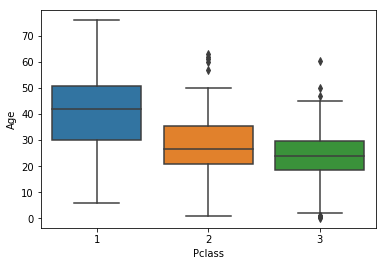

In [115]:
sns.boxplot(df1['Pclass'],df1['Age'])

In [116]:
df1.groupby('Pclass')['Age'].mean()

Pclass
1    40.918367
2    28.777500
3    24.027945
Name: Age, dtype: float64

In [117]:
def age_fill2(col):
    Age = col[0]
    Pclass = col[1]
    if pd.isnull(Age):
        if Pclass==1:
            return 37
        elif Pclass==2:
            return 30
        else:
            return 25
    else:
        return Age

In [118]:
df1['Age'] = df1[['Age','Pclass']].apply(age_fill2,axis=1)

In [119]:
df1['Fare'] = df1['Fare'].fillna(method='ffill')

In [120]:
df1 = df1.drop('Cabin',axis=1)

In [121]:
sex_dum2 = pd.get_dummies(df1['Sex'],drop_first=True)
df1 = df1.drop('Sex',axis=1)
embark_dum2 = pd.get_dummies(df1['Embarked'],drop_first=True)
df1 = df1.drop('Embarked',axis=1)
df1 = pd.concat([df1,sex_dum2,embark_dum2],axis=1)

In [122]:
df1.head(1)

,PassengerId,Pclass,Age,SibSp,Parch,Ticket,Fare,male,Q,S
0,892,3,34.5,0,0,330911,7.8292,1,1,0


In [123]:
df.head(1)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.25,1,0,1


In [124]:
df1 = df1.drop('Ticket',axis=1)

# Predicting Test Dataset

In [125]:
pred_test = lr.predict(df1)

In [126]:
predicted_values = pd.DataFrame(pred_test)

In [127]:
df1 = pd.concat([df1,predicted_values],axis=1)

# EDA Part 2  after Predictions

In [128]:
df1.rename(columns={0:'Survived(1)/Not(0)'},inplace=True)

In [129]:
df1.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S,Survived(1)/Not(0)
0,892,3,34.5,0,0,7.8292,1,1,0,0
1,893,3,47.0,1,0,7.0000,0,0,1,0
2,894,2,62.0,0,0,9.6875,1,1,0,0
3,895,3,27.0,0,0,8.6625,1,0,1,0
4,896,3,22.0,1,1,12.2875,0,0,1,1


In [130]:
round(df['Survived'].value_counts()/len(df)*100,2)

0    61.62
1    38.38
Name: Survived, dtype: float64

In [131]:
round(df1['Survived(1)/Not(0)'].value_counts()/len(df1)*100,3)

0    58.373
1    41.627
Name: Survived(1)/Not(0), dtype: float64

In [132]:
# Now performing EDA on Test Data to answer the question.

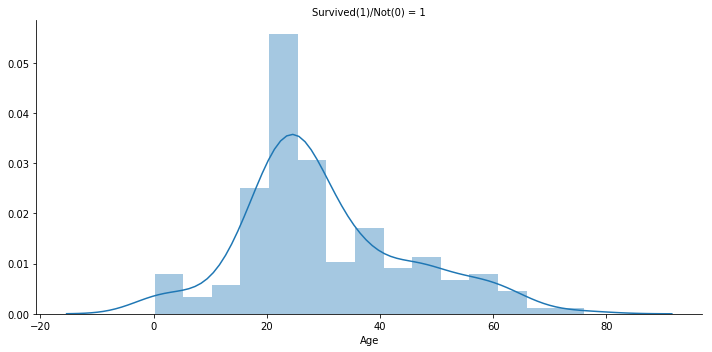

In [133]:
g  =sns.FacetGrid(df1[df1['Survived(1)/Not(0)']==1],col='Survived(1)/Not(0)',height=5,aspect=2)
g.map(sns.distplot,'Age')

In [134]:
df1.groupby('Age')['Survived(1)/Not(0)'].count().sort_values(ascending=False).head()

# Maximum to Survive were from Age 20 - Age 30

Age
25.0    83
30.0    20
24.0    17
21.0    17
22.0    16
Name: Survived(1)/Not(0), dtype: int64

In [135]:
df1['male'] = df1['male'].replace({0:'Female',1:'Male'})

In [136]:
df1.rename(columns={'male':'sex'},inplace=True)

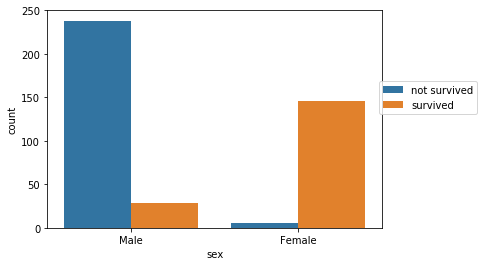

In [137]:
sns.countplot(df1['sex'],hue=df1['Survived(1)/Not(0)'])
plt.legend(bbox_to_anchor=(0.5,0.3,0.8,0.4),labels=['not survived','survived'])


# It can be seen that more number of Females were able to survive than males

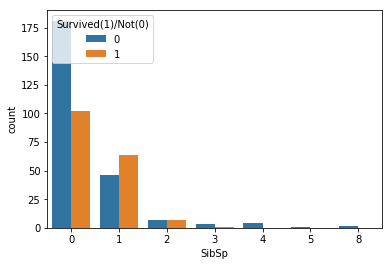

In [138]:
sns.countplot(df1['SibSp'],hue=df1['Survived(1)/Not(0)'])

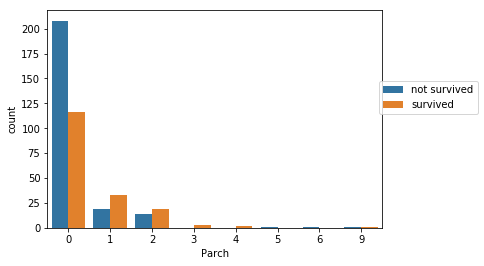

In [139]:
sns.countplot(df1['Parch'],hue=df1['Survived(1)/Not(0)'])
plt.legend(bbox_to_anchor=(0.5,0.3,0.8,0.4),labels=['not survived','survived'])


In [140]:
df1.groupby('Parch')['Survived(1)/Not(0)'].value_counts()

Parch  Survived(1)/Not(0)
0      0                     208
       1                     116
1      1                      33
       0                      19
2      1                      19
       0                      14
3      1                       3
4      1                       2
5      0                       1
6      0                       1
9      0                       1
       1                       1
Name: Survived(1)/Not(0), dtype: int64

In [141]:
# Important Pivot Table

passenger_survived_per_pclass_sex = pd.DataFrame(df1.groupby(['Pclass','sex','Survived(1)/Not(0)'])['Survived(1)/Not(0)'].count())

In [142]:
passenger_survived_per_pclass_sex

Survived(1)/Not(0)
Pclass sex    Survived(1)/Not(0)                    
1      Female 1                                   50
       Male   0                                   32
              1                                   25
2      Female 1                                   30
       Male   0                                   60
              1                                    3
3      Female 0                                    6
              1                                   66
       Male   0                                  146

In [143]:
df1.groupby(['Pclass'])['Survived(1)/Not(0)'].value_counts()

Pclass  Survived(1)/Not(0)
1       1                      75
        0                      32
2       0                      60
        1                      33
3       0                     152
        1                      66
Name: Survived(1)/Not(0), dtype: int64

In [144]:
df1.groupby(['Pclass','sex'])['Survived(1)/Not(0)'].value_counts()

Pclass  sex     Survived(1)/Not(0)
1       Female  1                      50
        Male    0                      32
                1                      25
2       Female  1                      30
        Male    0                      60
                1                       3
3       Female  1                      66
                0                       6
        Male    0                     146
Name: Survived(1)/Not(0), dtype: int64

In [145]:
round(df1.groupby(['Pclass'])['Pclass'].count()/len(df1)*100,2)

Pclass
1    25.60
2    22.25
3    52.15
Name: Pclass, dtype: float64

In [146]:
df1['sex'].value_counts()

Male      266
Female    152
Name: sex, dtype: int64

# ANALYSIS

1. More number of Females(266) than males (152).
2. Maximum passengers are from Pclass 3 i.e. 52 % of total passengers.
3. Maximum no.of survivors : Females of Pclass 3 (68) and males of Pclass 1 (15).
4. Minimum no.of survivors : Females of Pclass 2 (30) and males of Pclass 1 (15).
5. No male survivors in Pclass 2 (63) and 3 (146).
6. Maximum no.of Survivors are of Age group 20-40 years.

## Hence , Passenger who is a Female,in Pclass 3 , Aged b/w 20-40 years, having 0 or 1 sibling, 0 or 1 parent is likely to survive the Titanic Crash.

In [147]:
# Final Dataset consiting of PassengerId and Survived_or_not

In [148]:
df_final = df1[['PassengerId','Survived(1)/Not(0)']]

In [149]:
df_final.shape

(418, 2)

In [158]:
df_final.rename(columns={'Survived(1)/Not(0)':'Survived'},inplace=True)
df_final.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [159]:
df.shape

(891, 10)

In [160]:
df1.shape

(418, 10)